# Normalized colormap examples

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

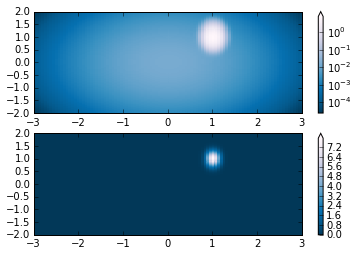

In [189]:
'''
Lognorm:  Instead of pcolor log10(Z1) you can have colorbars that have 
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) + 0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig,ax=plt.subplots(2,1)

pcm=ax[0].pcolor(X, Y, Z1, norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()), cmap='PuBu_r')
fig.colorbar(pcm,ax=ax[0],extend='max')

pcm=ax[1].pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm,ax=ax[1],extend='max')
fig.show()

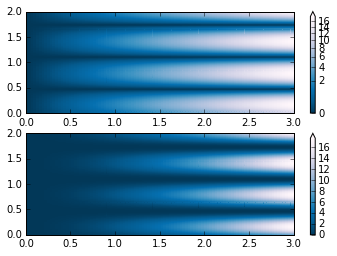

In [190]:
'''
Here a power-law trend in X partially obscures a rectified sine wave
in Y. We can remove the power law using a PowerNorm.
'''
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1+np.sin(Y*10.))*X**(2.)

fig,ax=plt.subplots(2,1)

pcm=ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=1./2.), cmap='PuBu_r')
fig.colorbar(pcm,ax=ax[0],extend='max')

pcm=ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm,ax=ax[1],extend='max')
fig.show()

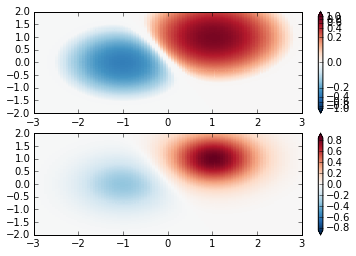

In [202]:
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
'''
two humps, one negative and one positive, The positive with 5-times 
the amplitude. Linearly, you cannot see detail in the negative hump.  
Here we logarithmically scale the positive and negative data separately. 

Note that colorbar labels do not come out looking very good.
'''
Z1 = (bivariate_normal(X, Y, 1.,1., 1.0, 1.0))**2  \
       - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

fig,ax=plt.subplots(2,1)

pcm=ax[0].pcolormesh(X, Y, Z1, 
                 norm=colors.SymLogNorm(linthresh=0.03,linscale=0.03,
                                        vmin=-1.0,vmax=1.0), 
                 cmap='RdBu_r')
fig.colorbar(pcm,ax=ax[0],extend='both')

pcm=ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r',vmin=-np.max(Z1))
fig.colorbar(pcm,ax=ax[1],extend='both')
fig.show()

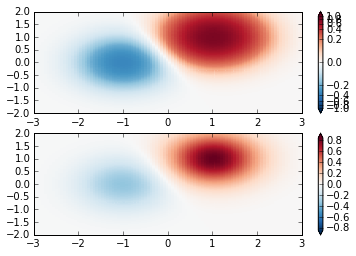

In [172]:
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# two humps, one negative and one positive, The positive with 5-times the amplitude. 
# Linearly, you cannot see detail in the negative hump.  Linearly normalizing the positive and 
# negative values about zero brings out detail in the negative:
Z1 = (bivariate_normal(X, Y, 1.,1., 1.0, 1.0))**2  \
       - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:

fig,ax=plt.subplots(2,1)

pcm=ax[0].pcolormesh(X, Y, Z1, 
                 norm=colors.SymLogNorm(linthresh=0.2,vmin=-1.,vmax=1.), 
                 cmap='RdBu_r')
fig.colorbar(pcm,ax=ax[0],extend='both')

pcm=ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r',vmin=-np.max(Z1))
fig.colorbar(pcm,ax=ax[1],extend='both')
fig.show()

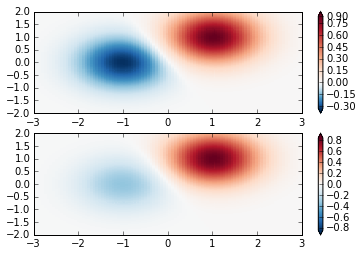

In [192]:
'''
An example with a customized normalization.  This one uses the 
example above, and normalizes the negative data differently from the 
positive.
'''
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1.,1., 1.0, 1.0))**2  \
       - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####
fig,ax=plt.subplots(2,1)

pcm=ax[0].pcolormesh(X, Y, Z1, 
                 norm=MidpointNormalize(midpoint=0.), 
                 cmap='RdBu_r')
fig.colorbar(pcm,ax=ax[0],extend='both')

pcm=ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r',vmin=-np.max(Z1))
fig.colorbar(pcm,ax=ax[1],extend='both')
fig.show()

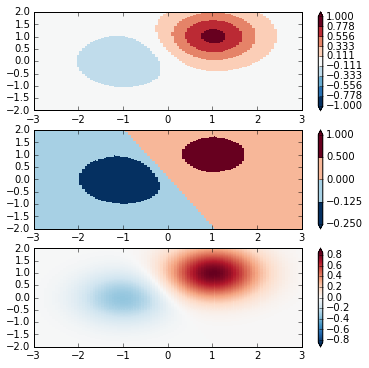

In [208]:
# boundary norm:  For this one you provide the boundaries for your
# colors, and the Norm puts the first color in between the first pair,
# the second color between the second pair, etc.  

fig,ax=plt.subplots(3,1,figsize=(6,6))
ax=ax.flatten()
# even bounds gives a contour-like effect
bounds= np.linspace(-1,1,10)
pcm=ax[0].pcolormesh(X, Y, Z1, 
                 norm=colors.BoundaryNorm(boundaries=bounds,ncolors=256), 
                 cmap='RdBu_r')
fig.colorbar(pcm,ax=ax[0],extend='both',orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25,-0.125,0,0.5,1])
pcm=ax[1].pcolormesh(X, Y, Z1, 
                 norm=colors.BoundaryNorm(boundaries=bounds,ncolors=256), 
                 cmap='RdBu_r')
fig.colorbar(pcm,ax=ax[1],extend='both',orientation='vertical')

pcm=ax[2].pcolormesh(X, Y, Z1, cmap='RdBu_r',vmin=-np.max(Z1))
fig.colorbar(pcm,ax=ax[2],extend='both',orientation='vertical')
fig.show()